# Data Preprocessing

Importing / Installing Libraries

In [ ]:
# imported libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

# installing ktrain
!pip install ktrain gwpy --quiet
import ktrain
from ktrain import text

Connecting to Google Drive

In [ ]:
# connecting to my drive
from google.colab import drive
drive.mount('/content/drive')

# setting up wine dataset
data = pd.read_csv('/content/drive/MyDrive/CS Foundation Courses/Machine Learning/ML_Project_Folder/AB_NYC_2019.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


General Data Info

In [ ]:
# dataset length
print("dataset length: " + str(len(data)))


# dataset head
data[['name', 'neighbourhood', 'price']].head()

dataset length: 48895


,name,neighbourhood,price
0,Clean & quiet apt home by the park,Kensington,149
1,Skylit Midtown Castle,Midtown,225
2,THE VILLAGE OF HARLEM....NEW YORK !,Harlem,150
3,Cozy Entire Floor of Brownstone,Clinton Hill,89
4,Entire Apt: Spacious Studio/Loft by central park,East Harlem,80


Looking at distribution of prices
* Not many cases past 750, so they will be dropped in an attempt to now scew the linear model

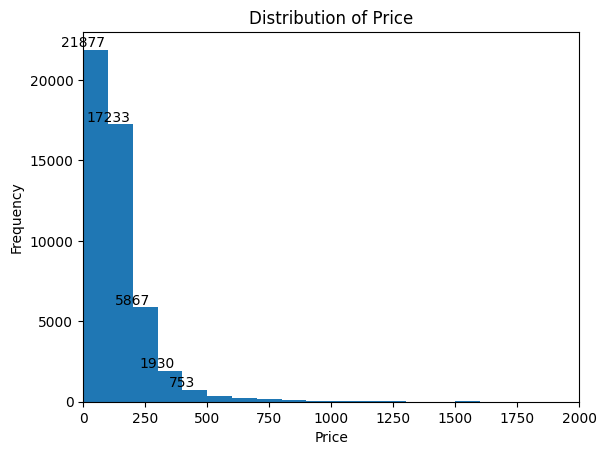

In [ ]:
plt.hist(data['price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.xlim([0, 2000])

hist, bin_edges = np.histogram(data['price'], bins=100)

# Add text annotations for the counts in each bin
for i in range(5):
    plt.text(bin_edges[i], hist[i], str(hist[i]), ha='center', va='bottom')

plt.show()


In [ ]:
data = data[data['price'] <= 325]

# dataset length
print("dataset length (After removing outliers: " + str(len(data)))

dataset length (After removing outliers: 45861


In [ ]:
data['name_neighbourhood'] = data.apply(lambda x: f"{x['name']} {x['neighbourhood']}", axis=1)

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,name_neighbourhood
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Clean & quiet apt home by the park Kensington
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Skylit Midtown Castle Midtown
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,THE VILLAGE OF HARLEM....NEW YORK ! Harlem
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Cozy Entire Floor of Brownstone Clinton Hill
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Entire Apt: Spacious Studio/Loft by central pa...


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# join the name and neighbourhood columns together
X = data['name_neighbourhood'].values
y = data['price'].values

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


# k-train

In [ ]:
# preprocess the text data using Keras
trn, val, preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                          x_test=X_test, y_test=y_test,
                                          ngram_range=3,
                                          maxlen=200,
                                          max_features=25000)

# creating text regression model
model = text.text_regression_model('linreg',
                                   train_data=trn,
                                   preproc=preproc)
learner = ktrain.get_learner(model,
                             train_data=trn,
                             val_data=val,
                             batch_size=64)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
574/574 [==============================] - 5s 8ms/step - loss: 18898.0059 - mae: 119.6095
Epoch 2/1024
574/574 [==============================] - 3s 6ms/step - loss: 18588.8945 - mae: 118.3176
Epoch 3/1024
574/574 [==============================] - 3s 5ms/step - loss: 8340.9922 - mae: 68.0472
Epoch 4/1024
574/574 [==============================] - 1s 1ms/step - loss: 17233.3555 - mae: 86.5242


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


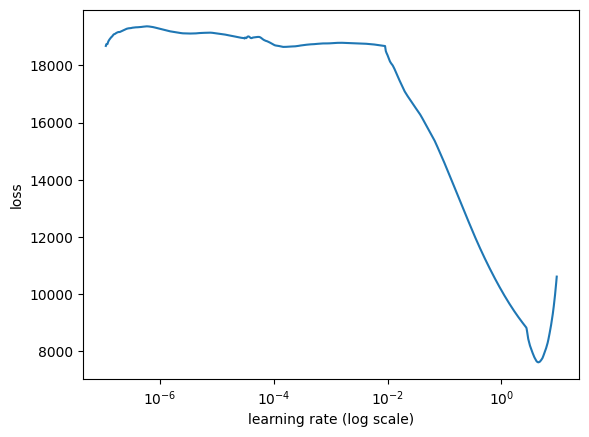

0.0066474252


In [ ]:
learner.lr_find()
learner.lr_plot()
best_lr = learner.lr_estimate()[0]
print(best_lr)

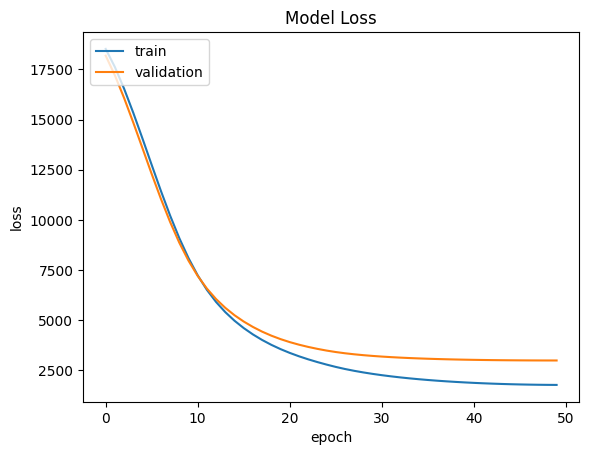

In [ ]:
learner.plot()

In [ ]:
learner.fit_onecycle(.006, 50)



begin training using onecycle policy with max lr of 0.006...
Epoch 1/50
574/574 [==============================] - 4s 7ms/step - loss: 18517.7773 - mae: 118.0259 - val_loss: 18181.6543 - val_mae: 116.6209
Epoch 2/50
574/574 [==============================] - 6s 10ms/step - loss: 17613.0918 - mae: 114.1737 - val_loss: 17199.8086 - val_mae: 112.3434
Epoch 3/50
574/574 [==============================] - 4s 8ms/step - loss: 16535.7637 - mae: 109.3957 - val_loss: 16071.9678 - val_mae: 107.1945
Epoch 4/50
574/574 [==============================] - 4s 7ms/step - loss: 15331.5811 - mae: 103.7560 - val_loss: 14844.8955 - val_mae: 101.2560
Epoch 5/50
574/574 [==============================] - 4s 6ms/step - loss: 14048.9541 - mae: 97.3793 - val_loss: 13567.3848 - val_mae: 94.6861
Epoch 6/50
574/574 [==============================] - 6s 10ms/step - loss: 12736.2725 - mae: 90.4915 - val_loss: 12285.2725 - val_mae: 87.8129
Epoch 7/50
574/574 [==============================] - 4s 7ms/step - loss: 1

# Keras


In [ ]:
# imported libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# connecting to my drive
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/CS Foundation Courses/Machine Learning/ML_Project_Folder/AB_NYC_2019.csv')
data = data[data['price'] <= 325]
data['name_neighbourhood'] = data.apply(lambda x: f"{x['name']} {x['neighbourhood']}", axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# create variables
X = data['name_neighbourhood'].values
y = data['price'].values

# preprocess the text data
tokenizer = Tokenizer(num_words=25000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=200)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

In [ ]:
# standardizing Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**SIMPLE LINEAR REGRESSION MODEL**

In [ ]:
# define the model architecture
model = Sequential()
model.add(Embedding(input_dim=25000,
                    output_dim=100,
                    input_length=200))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1))

# optimizer / callback
optimizer_obj = keras.optimizers.Adam(learning_rate=0.1)
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=3)

# compile the model
model.compile(loss='mse', optimizer=optimizer_obj, metrics=['mae'])

# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64,
                    validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
574/574 [==============================] - 45s 77ms/step - loss: 3851.3677 - mae: 47.2882 - val_loss: 2620.2461 - val_mae: 38.3240
Epoch 2/10
574/574 [==============================] - 44s 77ms/step - loss: 2601.3376 - mae: 38.2052 - val_loss: 2507.8413 - val_mae: 38.3168
Epoch 3/10
574/574 [==============================] - 43s 74ms/step - loss: 2431.4397 - mae: 36.6503 - val_loss: 2429.3374 - val_mae: 36.1257
Epoch 4/10
574/574 [==============================] - 43s 75ms/step - loss: 2311.7102 - mae: 35.5267 - val_loss: 2414.0740 - val_mae: 36.1286
Epoch 5/10
574/574 [==============================] - 47s 81ms/step - loss: 2199.4094 - mae: 34.5824 - val_loss: 2419.2510 - val_mae: 36.3526
Epoch 6/10
574/574 [==============================] - 41s 71ms/step - loss: 2119.4551 - mae: 33.8460 - val_loss: 2447.3806 - val_mae: 36.6721
Epoch 7/10
574/574 [==============================] - 42s 73ms/step - loss: 2069.4138 - mae: 33.2782 - val_loss: 2478.6565 - val_mae: 36.2298
Epoch 

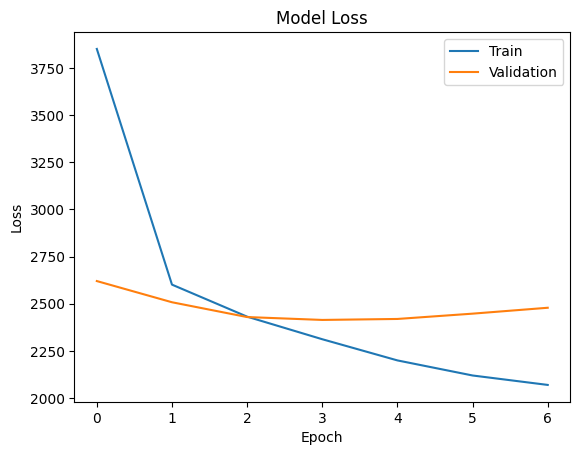

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**LSTM LINEAR REGRESSION MODEL**

took 25 minutes

In [ ]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=25000,
                    output_dim=100,
                    input_length=200))
model.add(LSTM(units=64,
               activation='tanh'))
model.add(Dense(units=1,
                activation='linear'))

# Compile the model
optimizer_obj = keras.optimizers.Adam(learning_rate=0.006)
model.compile(loss='mean_squared_error',
              optimizer=optimizer_obj,
              metrics=['mae'])

# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=7, batch_size=64, verbose=1)

Epoch 1/7
574/574 [==============================] - 213s 357ms/step - loss: 5600.8735 - mae: 56.1118 - val_loss: 4048.4705 - val_mae: 46.3560
Epoch 2/7
574/574 [==============================] - 211s 368ms/step - loss: 3009.4097 - mae: 41.1998 - val_loss: 2671.8740 - val_mae: 39.2692
Epoch 3/7
574/574 [==============================] - 218s 379ms/step - loss: 2519.9451 - mae: 37.2816 - val_loss: 2621.9548 - val_mae: 37.9529
Epoch 4/7
574/574 [==============================] - 213s 372ms/step - loss: 2377.1572 - mae: 36.1676 - val_loss: 2561.8303 - val_mae: 37.6831
Epoch 5/7
574/574 [==============================] - 212s 369ms/step - loss: 2265.6555 - mae: 35.1546 - val_loss: 2499.1177 - val_mae: 37.1538
Epoch 6/7
574/574 [==============================] - 214s 372ms/step - loss: 2166.7202 - mae: 34.2696 - val_loss: 2476.8086 - val_mae: 37.2412
Epoch 7/7
574/574 [==============================] - 214s 373ms/step - loss: 2085.7676 - mae: 33.5661 - val_loss: 2474.0535 - val_mae: 37.0087

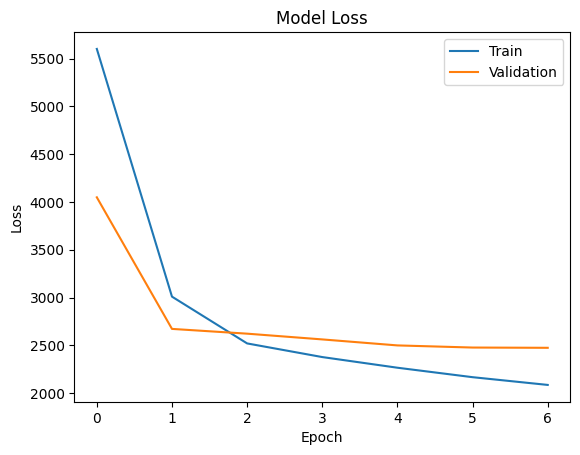

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
data['price'].mean()

152.7206871868289